In [1]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython import display
import time
import json
from copy import deepcopy
import csv
import os
print(f"current dir:{os.getcwd()}")

current dir:/Users/dc/test_python/coursera_rl/fundamentals_course1


In [2]:
# start with 10 items in inventory, 
# 1) random order 0-3 items arrives
# 2) agent can refill or do nothing
# 3) agent +1 Reaward per sold/fulfilled item, -0.5 penalty for unfulfilled item
# 4) policy refills inventory when inventroy levels drops below 3 or less
#

with open("/Users/dc/test_python/coursera_rl/fundamentals_course1/Inventory_Gridworld_Simulation.csv", 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['Step', 'Inventory', 'Order', 'Fulfilled', 'Action', 'Reward']
['1', '7', '3', '3', 'Wait', '3.0']
['2', '4', '3', '3', 'Wait', '3.0']
['3', '2', '2', '2', 'Wait', '2.0']
['4', '5', '2', '2', 'Refill', '2.0']
['5', '5', '0', '0', 'Wait', '0.0']
['6', '3', '2', '2', 'Wait', '2.0']
['7', '6', '2', '2', 'Refill', '2.0']
['8', '4', '2', '2', 'Wait', '2.0']
['9', '2', '2', '2', 'Wait', '2.0']
['10', '5', '2', '2', 'Refill', '2.0']
['11', '3', '2', '2', 'Wait', '2.0']
['12', '8', '0', '0', 'Refill', '0.0']
['13', '8', '0', '0', 'Wait', '0.0']
['14', '6', '2', '2', 'Wait', '2.0']
['15', '5', '1', '1', 'Wait', '1.0']
['16', '5', '0', '0', 'Wait', '0.0']
['17', '4', '1', '1', 'Wait', '1.0']
['18', '3', '1', '1', 'Wait', '1.0']
['19', '7', '1', '1', 'Refill', '1.0']
['20', '5', '2', '2', 'Wait', '2.0']
['21', '4', '1', '1', 'Wait', '1.0']
['22', '2', '2', '2', 'Wait', '2.0']
['23', '7', '0', '0', 'Refill', '0.0']
['24', '5', '2', '2', 'Wait', '2.0']
['25', '4', '1', '1', 'Wait', '1.0']
['26', '

In [3]:
with open("/Users/dc/test_python/coursera_rl/fundamentals_course1/Inventory_MDP_Transition_Matrix.csv", 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['s', 'a', "s'", "P(s'|s,a)"]
['0', 'Wait', '0', '1.0']
['0', 'Refill', '2', '0.25']
['0', 'Refill', '3', '0.25']
['0', 'Refill', '4', '0.25']
['0', 'Refill', '5', '0.25']
['1', 'Wait', '0', '0.75']
['1', 'Wait', '1', '0.25']
['1', 'Refill', '3', '0.25']
['1', 'Refill', '4', '0.25']
['1', 'Refill', '5', '0.25']
['1', 'Refill', '6', '0.25']
['2', 'Wait', '0', '0.5']
['2', 'Wait', '1', '0.25']
['2', 'Wait', '2', '0.25']
['2', 'Refill', '4', '0.25']
['2', 'Refill', '5', '0.25']
['2', 'Refill', '6', '0.25']
['2', 'Refill', '7', '0.25']
['3', 'Wait', '0', '0.25']
['3', 'Wait', '1', '0.25']
['3', 'Wait', '2', '0.25']
['3', 'Wait', '3', '0.25']
['3', 'Refill', '5', '0.25']
['3', 'Refill', '6', '0.25']
['3', 'Refill', '7', '0.25']
['3', 'Refill', '8', '0.25']
['4', 'Wait', '1', '0.25']
['4', 'Wait', '2', '0.25']
['4', 'Wait', '3', '0.25']
['4', 'Wait', '4', '0.25']
['4', 'Refill', '6', '0.25']
['4', 'Refill', '7', '0.25']
['4', 'Refill', '8', '0.25']
['4', 'Refill', '9', '0.25']
['5', 'Wait', 

In [4]:
with open("/Users/dc/test_python/coursera_rl/fundamentals_course1/Inventory_MDP_Reward_Matrix.csv","r") as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['s', 'a', "s'", "R(s,a,s')"]
['0', 'Wait', '0', '-0.75']
['0', 'Refill', '2', '0.75']
['0', 'Refill', '3', '0.5']
['0', 'Refill', '4', '0.25']
['1', 'Wait', '0', '0.375']
['1', 'Refill', '3', '0.75']
['1', 'Refill', '4', '0.5']
['1', 'Refill', '5', '0.25']
['2', 'Wait', '0', '0.875']
['2', 'Wait', '1', '0.25']
['2', 'Refill', '4', '0.75']
['2', 'Refill', '5', '0.5']
['2', 'Refill', '6', '0.25']
['3', 'Wait', '0', '0.75']
['3', 'Wait', '1', '0.5']
['3', 'Wait', '2', '0.25']
['3', 'Refill', '5', '0.75']
['3', 'Refill', '6', '0.5']
['3', 'Refill', '7', '0.25']
['4', 'Wait', '1', '0.75']
['4', 'Wait', '2', '0.5']
['4', 'Wait', '3', '0.25']
['4', 'Refill', '6', '0.75']
['4', 'Refill', '7', '0.5']
['4', 'Refill', '8', '0.25']
['5', 'Wait', '2', '0.75']
['5', 'Wait', '3', '0.5']
['5', 'Wait', '4', '0.25']
['5', 'Refill', '7', '0.75']
['5', 'Refill', '8', '0.5']
['5', 'Refill', '9', '0.25']
['6', 'Wait', '3', '0.75']
['6', 'Wait', '4', '0.5']
['6', 'Wait', '5', '0.25']
['6', 'Refill', '7', '0

In [ ]:
import numpy as np

# Define MDP components
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
STATES = list(range(MAX_INVENTORY + 1))
ACTIONS = [0, 1]  # 0 = Wait, 1 = Refill
GAMMA = 0.9
THRESHOLD = 1e-4

# Order probabilities (uniform distribution)
ORDER_PROBS = {o: 1 / (MAX_ORDER + 1) for o in range(MAX_ORDER + 1)}

# Transition function
def get_next_state(s, a, o):
    inventory = min(s + REFILL_AMOUNT, MAX_INVENTORY) if a == 1 else s
    fulfilled = min(o, inventory)
    return inventory - fulfilled

# Reward function
def get_reward(s, a, o):
    inventory = min(s + REFILL_AMOUNT, MAX_INVENTORY) if a == 1 else s
    fulfilled = min(o, inventory)
    unfulfilled = o - fulfilled
    return fulfilled - 0.5 * unfulfilled

# Build transition and reward matrices
transition_matrix = np.zeros((len(STATES), len(ACTIONS), len(STATES)))
reward_matrix = np.zeros((len(STATES), len(ACTIONS), len(STATES)))

for s in STATES:
    for a in ACTIONS:
        for o, p_o in ORDER_PROBS.items():
            s_prime = get_next_state(s, a, o)
            r = get_reward(s, a, o)
            transition_matrix[s, a, s_prime] += p_o
            reward_matrix[s, a, s_prime] += p_o * r

# Initialize value function and policy
V = np.zeros(len(STATES))
policy = np.zeros(len(STATES), dtype=int)

# Value Iteration
delta = float('inf')
iterations = 0
while delta > THRESHOLD:
    delta = 0
    new_V = np.copy(V)
    for s in STATES:
        q_values = []
        for a in ACTIONS:
            q_sa = 0
            for s_ in STATES:
                p = transition_matrix[s, a, s_]
                r = reward_matrix[s, a, s_]
                q_sa += p * (r + GAMMA * V[s_])
            q_values.append(q_sa)
        best_value = max(q_values)
        best_action = np.argmax(q_values)
        new_V[s] = best_value
        policy[s] = best_action
        delta = max(delta, abs(V[s] - best_value))
    V = new_V
    iterations += 1

# Output results
for s in STATES:
    action = "Refill" if policy[s] == 1 else "Wait"
    print(f"Inventory: {s:2d}, Value: {V[s]:.3f}, Optimal Action: {action}")

Inventory:  0, Value: 3.988, Optimal Action: Refill
Inventory:  1, Value: 3.953, Optimal Action: Refill
Inventory:  2, Value: 4.109, Optimal Action: Wait
Inventory:  3, Value: 3.982, Optimal Action: Wait
Inventory:  4, Value: 3.981, Optimal Action: Wait
Inventory:  5, Value: 3.988, Optimal Action: Wait
Inventory:  6, Value: 3.953, Optimal Action: Wait
Inventory:  7, Value: 3.945, Optimal Action: Wait
Inventory:  8, Value: 3.935, Optimal Action: Wait
Inventory:  9, Value: 3.919, Optimal Action: Wait
Inventory: 10, Value: 3.909, Optimal Action: Wait


In [6]:
import numpy as np

# Inventory MDP parameters
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
STATES = list(range(MAX_INVENTORY + 1))
ACTIONS = [0, 1]  # 0 = Wait, 1 = Refill
GAMMA = 0.9
THRESHOLD = 1e-4

# Define order probabilities (uniform demand)
ORDER_PROBS = {o: 1 / (MAX_ORDER + 1) for o in range(MAX_ORDER + 1)}

# Transition function
def get_next_state(s, a, o):
    inventory = min(s + REFILL_AMOUNT, MAX_INVENTORY) if a == 1 else s
    fulfilled = min(o, inventory)
    return inventory - fulfilled

# Reward function
def get_reward(s, a, o):
    inventory = min(s + REFILL_AMOUNT, MAX_INVENTORY) if a == 1 else s
    fulfilled = min(o, inventory)
    unfulfilled = o - fulfilled
    return fulfilled - 0.5 * unfulfilled

# Build transition and reward matrices
transition_matrix = np.zeros((len(STATES), len(ACTIONS), len(STATES)))
reward_matrix = np.zeros((len(STATES), len(ACTIONS), len(STATES)))

for s in STATES:
    for a in ACTIONS:
        for o, p_o in ORDER_PROBS.items():
            s_prime = get_next_state(s, a, o)
            r = get_reward(s, a, o)
            transition_matrix[s, a, s_prime] += p_o
            reward_matrix[s, a, s_prime] += p_o * r

# Initialize random policy and value function
policy = np.random.choice(ACTIONS, size=len(STATES))
V = np.zeros(len(STATES))

# Policy Iteration Loop
stable = False
while not stable:
    # Policy Evaluation
    delta = float('inf')
    while delta > THRESHOLD:
        delta = 0
        new_V = np.copy(V)
        for s in STATES:
            a = policy[s]
            q_sa = 0
            for s_ in STATES:
                p = transition_matrix[s, a, s_]
                r = reward_matrix[s, a, s_]
                q_sa += p * (r + GAMMA * V[s_])
            new_V[s] = q_sa
            delta = max(delta, abs(V[s] - q_sa))
        V = new_V

    # Policy Improvement
    stable = True
    for s in STATES:
        old_action = policy[s]
        q_values = []
        for a in ACTIONS:
            q_sa = 0
            for s_ in STATES:
                p = transition_matrix[s, a, s_]
                r = reward_matrix[s, a, s_]
                q_sa += p * (r + GAMMA * V[s_])
            q_values.append(q_sa)
        best_action = np.argmax(q_values)
        policy[s] = best_action
        if old_action != best_action:
            stable = False

# Print final policy and value function
for s in STATES:
    action = "Refill" if policy[s] == 1 else "Wait"
    print(f"Inventory: {s:2d}, Value: {V[s]:.3f}, Optimal Action: {action}")

Inventory:  0, Value: 3.988, Optimal Action: Refill
Inventory:  1, Value: 3.953, Optimal Action: Refill
Inventory:  2, Value: 4.109, Optimal Action: Wait
Inventory:  3, Value: 3.982, Optimal Action: Wait
Inventory:  4, Value: 3.981, Optimal Action: Wait
Inventory:  5, Value: 3.988, Optimal Action: Wait
Inventory:  6, Value: 3.953, Optimal Action: Wait
Inventory:  7, Value: 3.945, Optimal Action: Wait
Inventory:  8, Value: 3.935, Optimal Action: Wait
Inventory:  9, Value: 3.919, Optimal Action: Wait
Inventory: 10, Value: 3.909, Optimal Action: Wait


In [7]:
# Final policy mapping
action_map = {0: "Wait", 1: "Refill"}

print("Optimal Inventory Policy:\n")
for s in STATES:
    action = action_map[policy[s]]
    print(f"Inventory: {s:2d} → Optimal Action: {action}")

Optimal Inventory Policy:

Inventory:  0 → Optimal Action: Refill
Inventory:  1 → Optimal Action: Refill
Inventory:  2 → Optimal Action: Wait
Inventory:  3 → Optimal Action: Wait
Inventory:  4 → Optimal Action: Wait
Inventory:  5 → Optimal Action: Wait
Inventory:  6 → Optimal Action: Wait
Inventory:  7 → Optimal Action: Wait
Inventory:  8 → Optimal Action: Wait
Inventory:  9 → Optimal Action: Wait
Inventory: 10 → Optimal Action: Wait


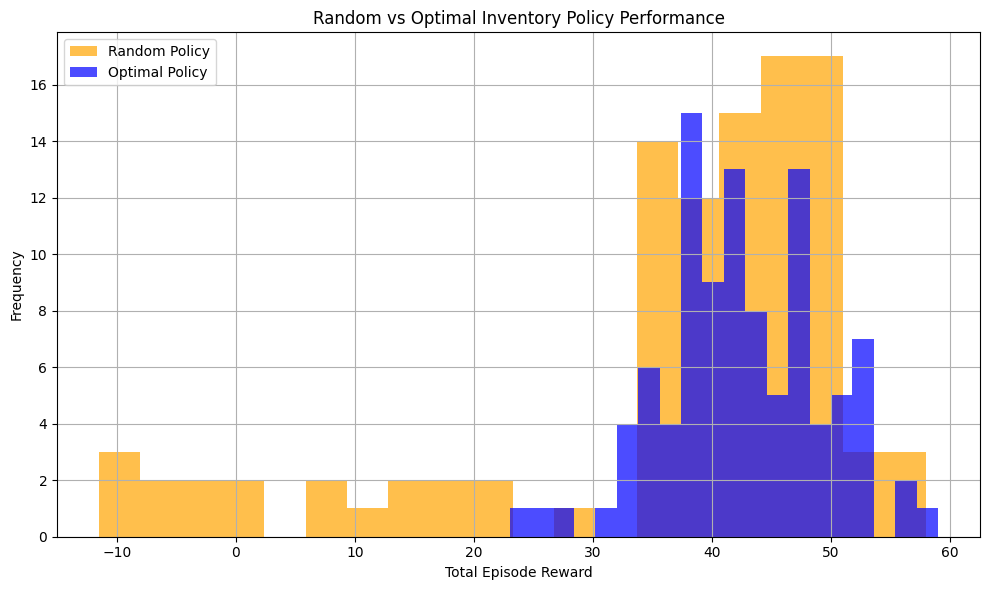

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inventory MDP parameters
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
STATES = list(range(MAX_INVENTORY + 1))
ACTIONS = [0, 1]

# Define the optimal policy (example result from earlier policy iteration)
policy = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])  # 1 = Refill, 0 = Wait

# Simulator
class InventorySimulator:
    def __init__(self, max_inventory=10, refill_amount=5, max_order=3, max_steps=30):
        self.max_inventory = max_inventory
        self.refill_amount = refill_amount
        self.max_order = max_order
        self.max_steps = max_steps
        self.reset()

    def reset(self):
        self.inventory = self.max_inventory
        self.steps = 0
        self.trajectory = []

    def step(self, action):
        if action == 1:
            self.inventory = min(self.max_inventory, self.inventory + self.refill_amount)
        order = np.random.randint(0, self.max_order + 1)
        fulfilled = min(order, self.inventory)
        self.inventory -= fulfilled
        reward = fulfilled - 0.5 * (order - fulfilled)
        self.trajectory.append(reward)
        self.steps += 1

    def run(self, policy, start_inventory=10):
        self.reset()
        self.inventory = start_inventory
        while self.steps < self.max_steps:
            current_inventory = min(self.inventory, self.max_inventory)
            action = policy[current_inventory]
            self.step(action)
        return sum(self.trajectory)

# Run multiple episodes and collect total rewards
def run_multiple_episodes(policy_func, episodes=100, steps=30):
    rewards = []
    for _ in range(episodes):
        sim = InventorySimulator(max_steps=steps)
        policy = policy_func()
        total_reward = sim.run(policy)
        rewards.append(total_reward)
    return rewards

# Policy generators
def random_policy():
    return np.random.choice(ACTIONS, size=len(STATES))

def fixed_optimal_policy():
    return policy.copy()

# Run simulations
optimal_rewards = run_multiple_episodes(fixed_optimal_policy)
random_rewards = run_multiple_episodes(random_policy)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(random_rewards, bins=20, alpha=0.7, label='Random Policy', color='orange')
plt.hist(optimal_rewards, bins=20, alpha=0.7, label='Optimal Policy', color='blue')
plt.xlabel("Total Episode Reward")
plt.ylabel("Frequency")
plt.title("Random vs Optimal Inventory Policy Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

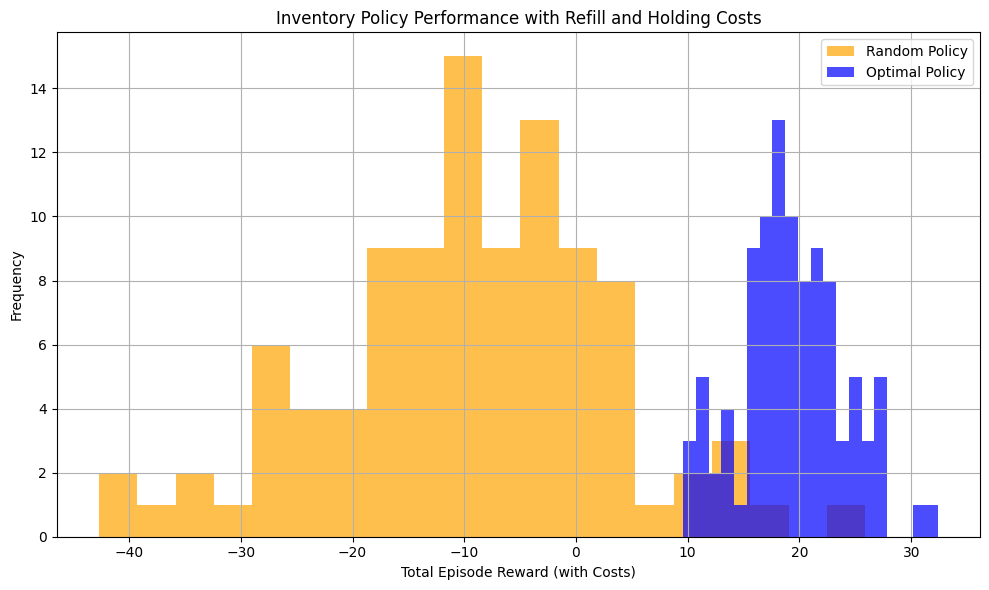

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
ACTIONS = [0, 1]
STATES = list(range(MAX_INVENTORY + 1))
EPISODES = 100
STEPS = 30

# Optimal policy (example from policy iteration)
policy = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Cost-aware simulator
class CostAwareInventorySimulator:
    def __init__(self, refill_cost=2.0, holding_cost=0.1, max_steps=30):
        self.max_inventory = MAX_INVENTORY
        self.refill_amount = REFILL_AMOUNT
        self.max_order = MAX_ORDER
        self.max_steps = max_steps
        self.refill_cost = refill_cost
        self.holding_cost = holding_cost
        self.reset()

    def reset(self):
        self.inventory = self.max_inventory
        self.steps = 0
        self.trajectory = []

    def step(self, action):
        cost = 0
        if action == 1:
            self.inventory = min(self.max_inventory, self.inventory + self.refill_amount)
            cost -= self.refill_cost

        order = np.random.randint(0, self.max_order + 1)
        fulfilled = min(order, self.inventory)
        self.inventory -= fulfilled

        holding_penalty = -self.holding_cost * self.inventory
        reward = fulfilled - 0.5 * (order - fulfilled) + cost + holding_penalty
        self.trajectory.append(reward)
        self.steps += 1

    def run(self, policy, start_inventory=10):
        self.reset()
        self.inventory = start_inventory
        while self.steps < self.max_steps:
            current_inventory = min(self.inventory, self.max_inventory)
            action = policy[current_inventory]
            self.step(action)
        return sum(self.trajectory)

# Policy functions
def random_policy():
    return np.random.choice(ACTIONS, size=len(STATES))

def fixed_optimal_policy():
    return policy.copy()

# Run multiple simulations
def run_episodes(policy_func, episodes=100):
    rewards = []
    for _ in range(episodes):
        sim = CostAwareInventorySimulator()
        p = policy_func()
        rewards.append(sim.run(p))
    return rewards

# Collect rewards
optimal_rewards = run_episodes(fixed_optimal_policy)
random_rewards = run_episodes(random_policy)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(random_rewards, bins=20, alpha=0.7, label='Random Policy', color='orange')
plt.hist(optimal_rewards, bins=20, alpha=0.7, label='Optimal Policy', color='blue')
plt.xlabel("Total Episode Reward (with Costs)")
plt.ylabel("Frequency")
plt.title("Inventory Policy Performance with Refill and Holding Costs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# modeling stockout in the reward function
stockout_penalty = -5.0 * (unfulfilled_quantity)

NameError: name 'unfulfilled_quantity' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
ACTIONS = [0, 1]
STATES = list(range(MAX_INVENTORY + 1))
EPISODES = 100
STEPS = 30

# Example optimal policy (from prior policy iteration)
policy = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Simulator with all costs
class StockoutAwareInventorySimulator:
    def __init__(self, refill_cost=2.0, holding_cost=0.1, stockout_penalty=5.0, max_steps=30):
        self.max_inventory = MAX_INVENTORY
        self.refill_amount = REFILL_AMOUNT
        self.max_order = MAX_ORDER
        self.max_steps = max_steps
        self.refill_cost = refill_cost
        self.holding_cost = holding_cost
        self.stockout_penalty = stockout_penalty
        self.reset()

    def reset(self):
        self.inventory = self.max_inventory
        self.steps = 0
        self.trajectory = []

    def step(self, action):
        cost = 0
        if action == 1:
            self.inventory = min(self.max_inventory, self.inventory + self.refill_amount)
            cost -= self.refill_cost

        order = np.random.randint(0, self.max_order + 1)
        fulfilled = min(order, self.inventory)
        unfulfilled = order - fulfilled
        self.inventory -= fulfilled

        holding_penalty = -self.holding_cost * self.inventory
        stockout_loss = -self.stockout_penalty * unfulfilled

        reward = fulfilled + cost + holding_penalty + stockout_loss
        self.trajectory.append(reward)
        self.steps += 1

    def run(self, policy, start_inventory=10):
        self.reset()
        self.inventory = start_inventory
        while self.steps < self.max_steps:
            current_inventory = min(self.inventory, self.max_inventory)
            action = policy[current_inventory]
            self.step(action)
        return sum(self.trajectory)

# Policy generators
def fixed_optimal_policy():
    return policy.copy()

def random_policy():
    return np.random.choice(ACTIONS, size=len(STATES))

# Run simulations
def run_episodes(policy_func, episodes=100):
    rewards = []
    for _ in range(episodes):
        sim = StockoutAwareInventorySimulator()
        p = policy_func()
        rewards.append(sim.run(p))
    return rewards

# Collect data
optimal_rewards = run_episodes(fixed_optimal_policy)
random_rewards = run_episodes(random_policy)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(random_rewards, bins=20, alpha=0.7, label='Random Policy', color='orange')
plt.hist(optimal_rewards, bins=20, alpha=0.7, label='Optimal Policy', color='blue')
plt.xlabel("Total Episode Reward (with Refill, Holding, and Stockout Costs)")
plt.ylabel("Frequency")
plt.title("Inventory Policy Performance: Optimal vs Random")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

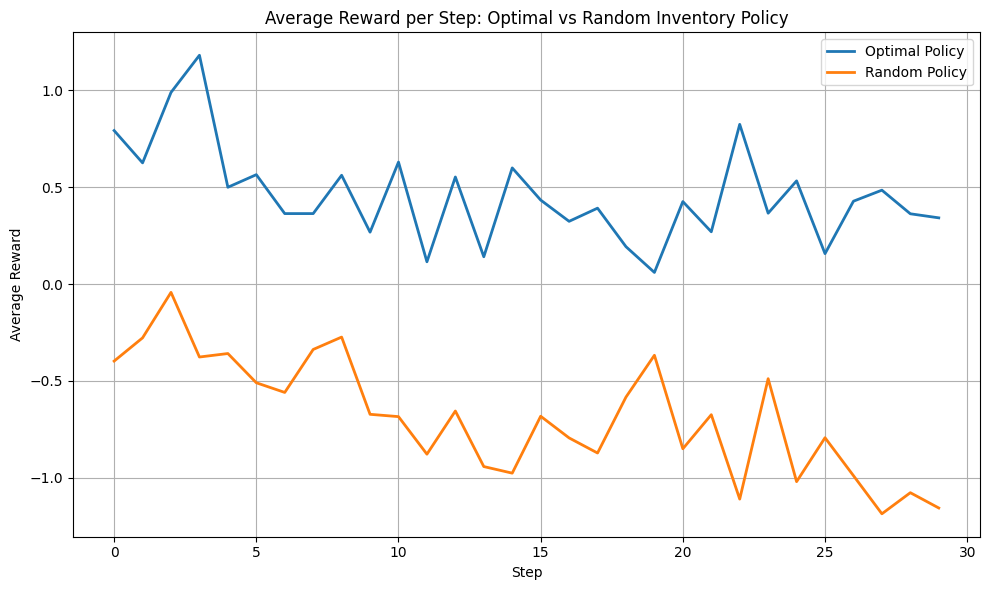

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
ACTIONS = [0, 1]
STATES = list(range(MAX_INVENTORY + 1))
EPISODES = 100
STEPS = 30

# Optimal policy (example from policy iteration)
policy = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Cost-aware simulator
class StockoutAwareInventorySimulator:
    def __init__(self, refill_cost=2.0, holding_cost=0.1, stockout_penalty=5.0, max_steps=30):
        self.max_inventory = MAX_INVENTORY
        self.refill_amount = REFILL_AMOUNT
        self.max_order = MAX_ORDER
        self.max_steps = max_steps
        self.refill_cost = refill_cost
        self.holding_cost = holding_cost
        self.stockout_penalty = stockout_penalty
        self.reset()

    def reset(self):
        self.inventory = self.max_inventory
        self.steps = 0
        self.trajectory = []

    def step(self, action):
        cost = 0
        if action == 1:
            self.inventory = min(self.max_inventory, self.inventory + self.refill_amount)
            cost -= self.refill_cost

        order = np.random.randint(0, self.max_order + 1)
        fulfilled = min(order, self.inventory)
        unfulfilled = order - fulfilled
        self.inventory -= fulfilled

        holding_penalty = -self.holding_cost * self.inventory
        stockout_loss = -self.stockout_penalty * unfulfilled

        reward = fulfilled + cost + holding_penalty + stockout_loss
        self.trajectory.append(reward)
        self.steps += 1

    def run_stepwise(self, policy, steps=30):
        self.reset()
        self.inventory = self.max_inventory
        rewards = []
        for _ in range(steps):
            state = min(self.inventory, self.max_inventory)
            action = policy[state]
            self.step(action)
            rewards.append(self.trajectory[-1])
        return rewards

# Policy generators
def fixed_optimal_policy():
    return policy.copy()

def random_policy():
    return np.random.choice(ACTIONS, size=len(STATES))

# Function to get average reward per step
def run_reward_trend(policy_func, episodes=100, steps=30):
    reward_matrix = np.zeros((episodes, steps))
    for i in range(episodes):
        sim = StockoutAwareInventorySimulator(max_steps=steps)
        p = policy_func()
        reward_matrix[i] = sim.run_stepwise(p, steps)
    return reward_matrix.mean(axis=0)

# Compute average reward per step
avg_rewards_optimal = run_reward_trend(fixed_optimal_policy)
avg_rewards_random = run_reward_trend(random_policy)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_rewards_optimal, label="Optimal Policy", linewidth=2)
plt.plot(avg_rewards_random, label="Random Policy", linewidth=2)
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.title("Average Reward per Step: Optimal vs Random Inventory Policy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

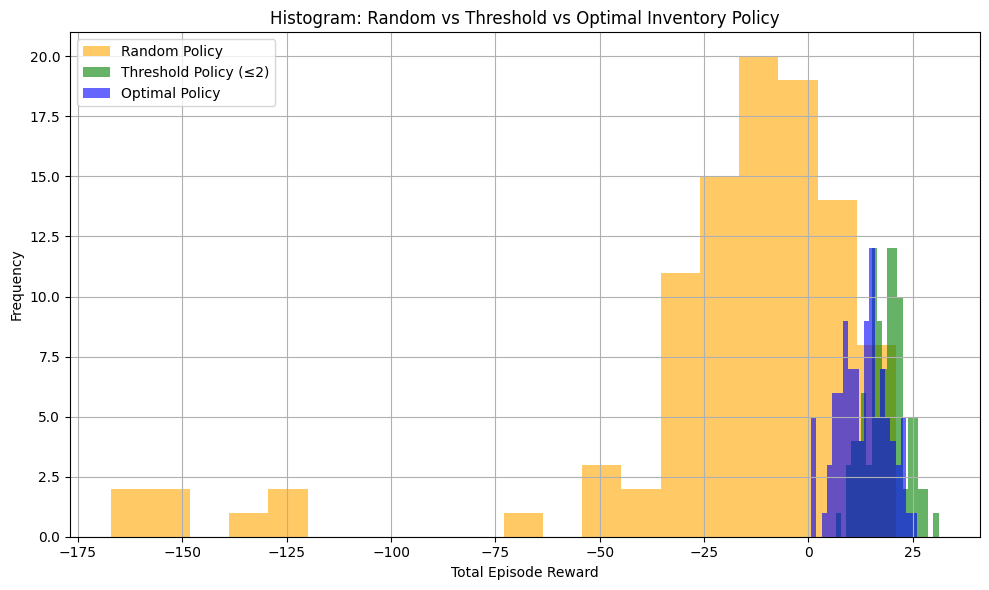

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
ACTIONS = [0, 1]
STATES = list(range(MAX_INVENTORY + 1))
EPISODES = 100
STEPS = 30

# Optimal policy (from policy iteration)
policy = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Simulator with stockout penalties
class StockoutAwareInventorySimulator:
    def __init__(self, refill_cost=2.0, holding_cost=0.1, stockout_penalty=5.0, max_steps=30):
        self.max_inventory = MAX_INVENTORY
        self.refill_amount = REFILL_AMOUNT
        self.max_order = MAX_ORDER
        self.max_steps = max_steps
        self.refill_cost = refill_cost
        self.holding_cost = holding_cost
        self.stockout_penalty = stockout_penalty
        self.reset()

    def reset(self):
        self.inventory = self.max_inventory
        self.steps = 0
        self.trajectory = []

    def step(self, action):
        cost = 0
        if action == 1:
            self.inventory = min(self.max_inventory, self.inventory + self.refill_amount)
            cost -= self.refill_cost

        order = np.random.randint(0, self.max_order + 1)
        fulfilled = min(order, self.inventory)
        unfulfilled = order - fulfilled
        self.inventory -= fulfilled

        holding_penalty = -self.holding_cost * self.inventory
        stockout_loss = -self.stockout_penalty * unfulfilled
        reward = fulfilled + cost + holding_penalty + stockout_loss
        self.trajectory.append(reward)
        self.steps += 1

    def run(self, policy):
        self.reset()
        while self.steps < self.max_steps:
            state = min(self.inventory, self.max_inventory)
            action = policy[state]
            self.step(action)
        return sum(self.trajectory)

# Policies
def fixed_optimal_policy():
    return policy.copy()

def random_policy():
    return np.random.choice(ACTIONS, size=len(STATES))

def threshold_policy(threshold=2):
    return np.array([1 if s <= threshold else 0 for s in STATES])

# Run episodes for a given policy function
def run_episodes(policy_func, episodes=100):
    rewards = []
    for _ in range(episodes):
        sim = StockoutAwareInventorySimulator()
        p = policy_func()
        rewards.append(sim.run(p))
    return rewards

# Collect rewards
optimal_rewards = run_episodes(fixed_optimal_policy)
random_rewards = run_episodes(random_policy)
threshold_rewards = run_episodes(lambda: threshold_policy(threshold=2))

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(random_rewards, bins=20, alpha=0.6, label='Random Policy', color='orange')
plt.hist(threshold_rewards, bins=20, alpha=0.6, label='Threshold Policy (≤2)', color='green')
plt.hist(optimal_rewards, bins=20, alpha=0.6, label='Optimal Policy', color='blue')
plt.xlabel("Total Episode Reward")
plt.ylabel("Frequency")
plt.title("Histogram: Random vs Threshold vs Optimal Inventory Policy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

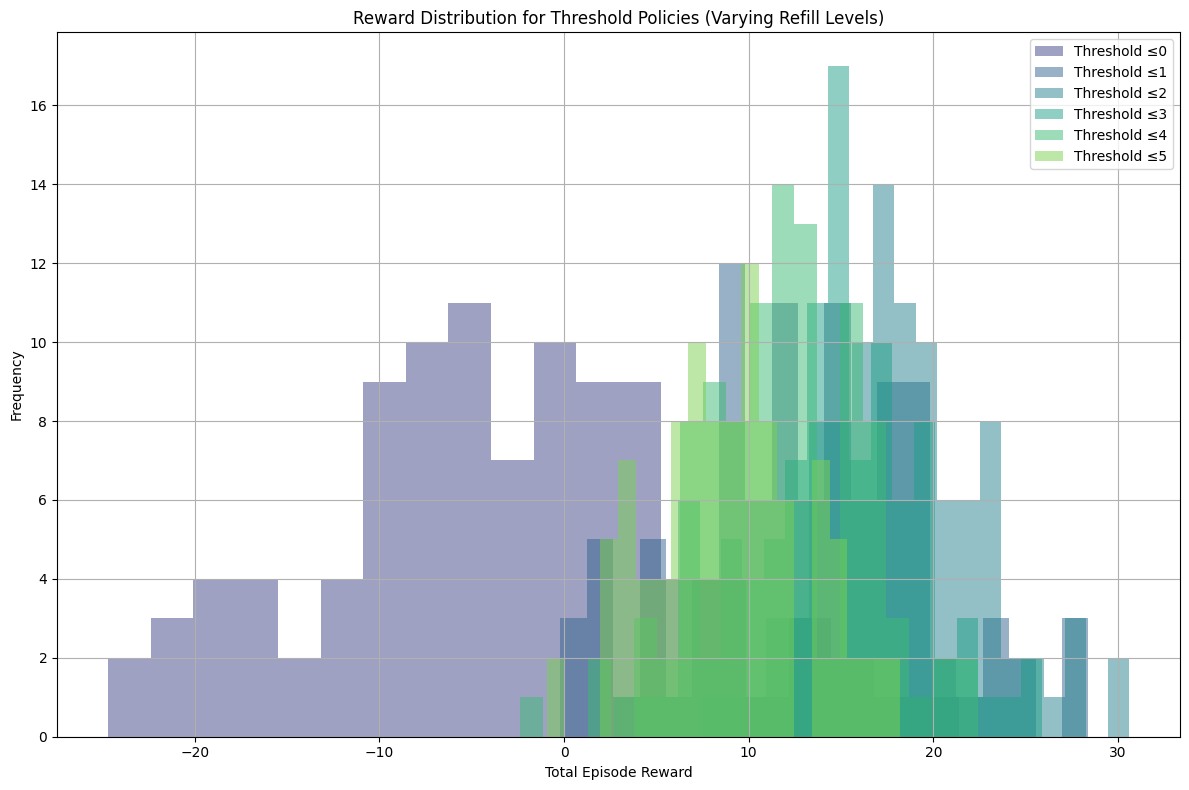

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  

# --- Constants ---
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
STEPS = 30
EPISODES = 100
ACTIONS = [0, 1]
STATES = list(range(MAX_INVENTORY + 1))

# --- Simulator with refill, holding, and stockout penalties ---
class StockoutAwareInventorySimulator:
    def __init__(self, refill_cost=2.0, holding_cost=0.1, stockout_penalty=5.0, max_steps=30):
        self.max_inventory = MAX_INVENTORY
        self.refill_amount = REFILL_AMOUNT
        self.max_order = MAX_ORDER
        self.max_steps = max_steps
        self.refill_cost = refill_cost
        self.holding_cost = holding_cost
        self.stockout_penalty = stockout_penalty
        self.reset()

    def reset(self):
        self.inventory = self.max_inventory
        self.steps = 0
        self.trajectory = []

    def step(self, action):
        cost = 0
        if action == 1:
            self.inventory = min(self.max_inventory, self.inventory + self.refill_amount)
            cost -= self.refill_cost

        order = np.random.randint(0, self.max_order + 1)
        fulfilled = min(order, self.inventory)
        unfulfilled = order - fulfilled
        self.inventory -= fulfilled

        holding_penalty = -self.holding_cost * self.inventory
        stockout_loss = -self.stockout_penalty * unfulfilled
        reward = fulfilled + cost + holding_penalty + stockout_loss
        self.trajectory.append(reward)
        self.steps += 1

    def run(self, policy):
        self.reset()
        while self.steps < self.max_steps:
            state = min(self.inventory, self.max_inventory)
            action = policy[state]
            self.step(action)
        return sum(self.trajectory)

# --- Policy definitions ---
def threshold_policy(threshold=2):
    return np.array([1 if s <= threshold else 0 for s in STATES])

def run_episodes(policy_func, episodes=100):
    rewards = []
    for _ in range(episodes):
        sim = StockoutAwareInventorySimulator()
        p = policy_func()
        rewards.append(sim.run(p))
    return rewards

# --- Sweep over threshold levels ---
thresholds = [0, 1, 2, 3, 4, 5]
threshold_results = {}
for t in thresholds:
    threshold_results[f"Threshold ≤{t}"] = run_episodes(lambda: threshold_policy(threshold=t))

# --- Plot histograms ---
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(thresholds)))
for i, t in enumerate(thresholds):
    label = f"Threshold ≤{t}"
    plt.hist(threshold_results[label], bins=20, alpha=0.5, label=label, color=colors[i])

plt.xlabel("Total Episode Reward")
plt.ylabel("Frequency")
plt.title("Reward Distribution for Threshold Policies (Varying Refill Levels)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

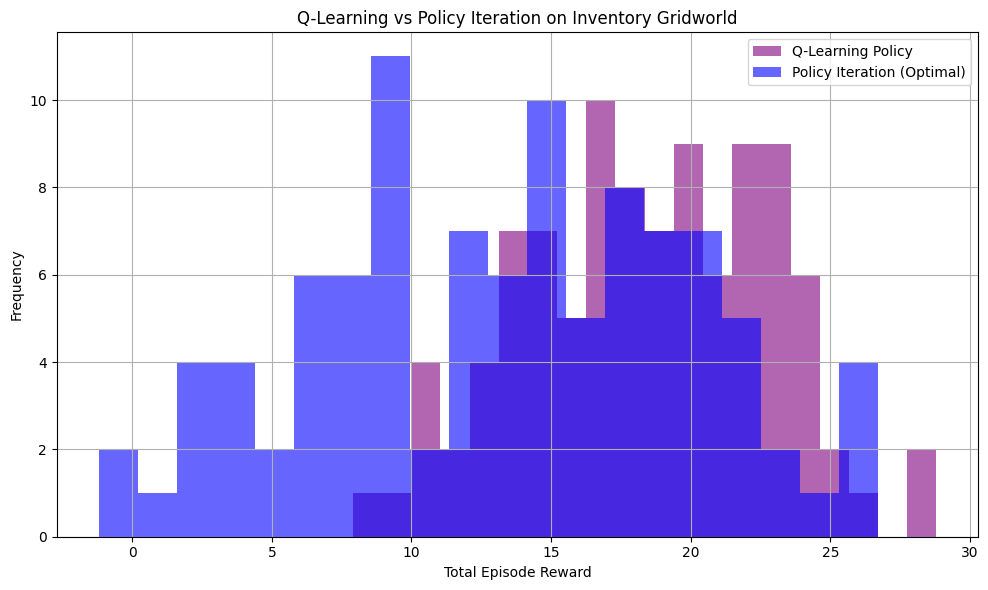

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
MAX_INVENTORY = 10
REFILL_AMOUNT = 5
MAX_ORDER = 3
ACTIONS = [0, 1]  # 0 = wait, 1 = refill
STATES = list(range(MAX_INVENTORY + 1))

# Inventory environment with cost modeling
class StockoutAwareInventorySimulator:
    def __init__(self, refill_cost=2.0, holding_cost=0.1, stockout_penalty=5.0, max_steps=30):
        self.max_inventory = MAX_INVENTORY
        self.refill_amount = REFILL_AMOUNT
        self.max_order = MAX_ORDER
        self.max_steps = max_steps
        self.refill_cost = refill_cost
        self.holding_cost = holding_cost
        self.stockout_penalty = stockout_penalty
        self.reset()

    def reset(self):
        self.inventory = self.max_inventory
        self.steps = 0
        self.trajectory = []

    def step(self, action):
        cost = 0
        if action == 1:
            self.inventory = min(self.max_inventory, self.inventory + self.refill_amount)
            cost -= self.refill_cost

        order = np.random.randint(0, self.max_order + 1)
        fulfilled = min(order, self.inventory)
        unfulfilled = order - fulfilled
        self.inventory -= fulfilled

        holding_penalty = -self.holding_cost * self.inventory
        stockout_loss = -self.stockout_penalty * unfulfilled
        reward = fulfilled + cost + holding_penalty + stockout_loss
        self.trajectory.append(reward)
        self.steps += 1

    def run(self, policy):
        self.reset()
        while self.steps < self.max_steps:
            state = min(self.inventory, self.max_inventory)
            action = policy[state]
            self.step(action)
        return sum(self.trajectory)

# Q-learning Agent
class QLearningInventoryAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=1000, steps=30):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.steps = steps
        self.q_table = np.zeros((MAX_INVENTORY + 1, len(ACTIONS)))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(ACTIONS)
        return np.argmax(self.q_table[state])

    def learn(self):
        for _ in range(self.episodes):
            sim = StockoutAwareInventorySimulator(max_steps=self.steps)
            sim.reset()
            state = min(sim.inventory, MAX_INVENTORY)
            for _ in range(self.steps):
                action = self.choose_action(state)
                sim.step(action)
                reward = sim.trajectory[-1]
                next_state = min(sim.inventory, MAX_INVENTORY)
                best_next_q = np.max(self.q_table[next_state])
                td_target = reward + self.gamma * best_next_q
                td_error = td_target - self.q_table[state, action]
                self.q_table[state, action] += self.alpha * td_error
                state = next_state

    def get_policy(self):
        return np.argmax(self.q_table, axis=1)

# Precomputed optimal policy from policy iteration
optimal_policy = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Evaluate total reward for a policy
def run_policy(policy, episodes=100):
    rewards = []
    for _ in range(episodes):
        sim = StockoutAwareInventorySimulator()
        rewards.append(sim.run(policy))
    return rewards

# Train Q-learning agent
ql_agent = QLearningInventoryAgent()
ql_agent.learn()
ql_policy = ql_agent.get_policy()

# Run simulations
q_learning_rewards = run_policy(ql_policy)
optimal_rewards = run_policy(optimal_policy)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(q_learning_rewards, bins=20, alpha=0.6, label='Q-Learning Policy', color='purple')
plt.hist(optimal_rewards, bins=20, alpha=0.6, label='Policy Iteration (Optimal)', color='blue')
plt.xlabel("Total Episode Reward")
plt.ylabel("Frequency")
plt.title("Q-Learning vs Policy Iteration on Inventory Gridworld")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
import numpy as np
import gym
from gym import spaces

class InventoryEnv(gym.Env):
    def __init__(self, demand_mean, holding_cost, stockout_penalty, max_inventory=20, max_order=5):
        super().__init__()
        self.max_inventory = max_inventory
        self.max_order = max_order
        self.demand_mean = demand_mean
        self.holding_cost = holding_cost
        self.stockout_penalty = stockout_penalty

        self.observation_space = spaces.Discrete(self.max_inventory + 1)
        self.action_space = spaces.Discrete(self.max_order + 1)

    def reset(self):
        self.inventory = np.random.randint(0, self.max_inventory + 1)
        return self.inventory

    def step(self, action):
        order_qty = action
        demand = np.random.poisson(self.demand_mean)
        sales = min(self.inventory + order_qty, demand)
        leftover = self.inventory + order_qty - sales

        reward = -self.holding_cost * leftover
        if demand > self.inventory + order_qty:
            reward -= self.stockout_penalty * (demand - (self.inventory + order_qty))

        self.inventory = leftover
        done = False  # or end after T steps
        return self.inventory, reward, done, {}

In [ ]:
def sample_random_env():
    return InventoryEnv(
        demand_mean=np.random.uniform(2, 6),
        holding_cost=np.random.uniform(0.1, 1.0),
        stockout_penalty=np.random.uniform(5, 20)
    )

Q = np.zeros((21, 6))  # state: 0-20 inventory, action: 0-5 order
alpha, gamma, epsilon = 0.1, 0.99, 0.1

for episode in range(5000):
    env = sample_random_env()
    s = env.reset()
    for _ in range(50):  # episode length
        if np.random.rand() < epsilon:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[s])
        s_, r, _, _ = env.step(a)
        # q learning
        Q[s, a] += alpha * (r + gamma * np.max(Q[s_]) - Q[s, a])
        s = s_

IndexError: index 23 is out of bounds for axis 0 with size 21

In [31]:
import torch
import torch.nn as nn

class MetaInventoryPolicy(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(4, 64),  # [inventory_level, demand_mean, holding_cost, stockout_penalty]
            nn.ReLU(),
            nn.Linear(64, 6)  # 6 actions (order amounts)
        )

    def forward(self, state_and_task):
        return self.net(state_and_task)

In [32]:
policy = MetaInventoryPolicy()
optimizer = torch.optim.Adam(policy.parameters(), lr=1e-3)

for episode in range(10000):
    if episode % 100 ==0:
        print(f"episode:{episode}")
    env = sample_random_env()
    s = env.reset()
    for idx in range(30):
        #print(idx)
        state_vec = torch.tensor([s, env.demand_mean, env.holding_cost, env.stockout_penalty], dtype=torch.float32)
        logits = policy(state_vec)
        action = torch.argmax(logits).item()
        s_, r, _, _ = env.step(action)
        target = r + 0.99 * torch.max(policy(torch.tensor([s_, env.demand_mean, env.holding_cost, env.stockout_penalty], dtype=torch.float32)))
        loss = (logits[action] - target.detach())**2

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        s = s_

episode:0
episode:100
episode:200
episode:300
episode:400
episode:500
episode:600
episode:700
episode:800
episode:900
episode:1000
episode:1100
episode:1200
episode:1300
episode:1400
episode:1500
episode:1600
episode:1700
episode:1800
episode:1900
episode:2000
episode:2100
episode:2200
episode:2300
episode:2400
episode:2500
episode:2600
episode:2700
episode:2800
episode:2900
episode:3000
episode:3100
episode:3200
episode:3300
episode:3400
episode:3500
episode:3600
episode:3700
episode:3800
episode:3900
episode:4000
episode:4100
episode:4200
episode:4300
episode:4400
episode:4500
episode:4600
episode:4700
episode:4800
episode:4900
episode:5000
episode:5100
episode:5200
episode:5300
episode:5400
episode:5500
episode:5600
episode:5700
episode:5800
episode:5900
episode:6000
episode:6100
episode:6200
episode:6300
episode:6400
episode:6500
episode:6600
episode:6700
episode:6800
episode:6900
episode:7000
episode:7100
episode:7200
episode:7300
episode:7400
episode:7500
episode:7600
episode:770